# Klasse A versterkers

<a href="./slides/Klasse-A.slides.html">![slides](https://img.shields.io/badge/slides-beschikbaar-blue)</a> 

## Indeling vermogenversterkers

In {numref}`vermogenversterkers` geven we een overzicht van de verschillende versterkers die we zullen bespreken in de leerlijn analoge elektronica.

```{table} Indeling van de vermogenversterkers
:name: vermogenversterkers

|   | laagfrequent of breedband  | hoogfrequent of resonant|
|:--| :-- | :-- |
|1 transistor <BR> in de vermogentrap  |**Klasse A**      |Klasse C <BR> Klasse F <BR>Klasse E|
|2 of meer  transistors <BR>in de vermogentrap |  Klasse B  <BR> Klasse G| Klasse D  |
```

In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from  matplotlib import patches
import scipy.signal as signal
import numpy as np
from PySpice.Probe.Plot import plot
from PySpice.Spice.Parser import SpiceParser
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import schemdraw as schem
import schemdraw.elements as e
from ipywidgets import interact,FloatSlider
usewidgets=False;
    
def spicelisting(filename):
    with open(filename) as f:
        for line in f:
            print(line.strip())
    print()

### Basisschema

Het basisschema van de klasse A versterker vinden we terug in {numref}`Afig1`. Om hiervan een Spice simulatie te maken, nummeren we de verschillende knopen in dit netwerk zoals je kan zien in {numref}`Afig1_2`.

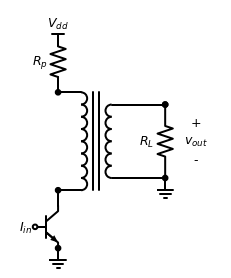

In [41]:
d = schem.Drawing()
T = d.add(e.BJT_NPN, lftlabel='$I_{in}$')
d.add(e.GND, xy=T.emitter)
d.add(e.DOT)
d.add(e.DOT_OPEN, xy=T.base)
d.add(e.LINE, xy=T.collector, d='up', l=0.5)
d.add(e.DOT)
d.add(e.LINE, d='right', l=0.75)
trans = d.add(e.Transformer(t1=8, t2=6, d='right'))
d.add(e.LINE, xy=trans.p1, d='left', l=0.75)
d.add(e.DOT)
d.add(e.LINE,  d='up', l=0.5)
Rp = d.add(e.RES, d='up', label='$R_p$',l=0.25)
d.add(e.VDD, label='$V_{dd}$')
s1=d.add(e.LINE, xy=trans.s1, d='right', l=1.75)
d.add(e.DOT)
d.add(e.LINE, xy=trans.s2, d='right', l=1.75)
d.add(e.DOT)
d.add(e.GND)
RL = d.add(e.RES, d='up', toy=s1.end,label='$R_L$')
d.add(e.DOT)

d.add(e.GAP_LABEL, d='up', xy= RL.start, toy= RL.end, label=['-','$v_{out}$','$+$'],lblofst=-1)
d.draw()

```{figure} ./images/mpl.svg
---
name: Afig1
---
Basisschema van de klasse A versterker
```

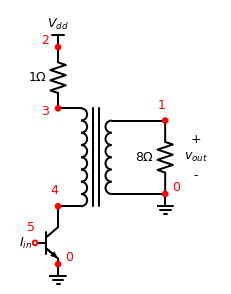

In [2]:
d = schem.Drawing()
T = d.add(e.BJT_NPN, lftlabel='$I_{in}$')
d.add(e.GND, xy=T.emitter)
dot0 =d.add(e.DOT, color='red')
dot0.add_label('0',  loc='center', ofst=[.5,0], align=('right','bottom'))
dot5=d.add(e.DOT_OPEN, xy=T.base, color='red')
dot5.add_label('5',  loc='center', ofst=[0,.3], align=('right','bottom'))

d.add(e.LINE, xy=T.collector, d='up', l=0.5)
dot4 =d.add(e.DOT,color='red')
dot4.add_label('4',  loc='center', ofst=[0,.3], align=('right','bottom'))
d.add(e.LINE, d='right', l=0.75)
trans = d.add(e.Transformer(t1=8, t2=6, d='right'))
d.add(e.LINE, xy=trans.p1, d='left', l=0.75)
dot3 =d.add(e.DOT,color='red')
dot3.add_label('3',  loc='center', ofst=[-0.3,-0.3], align=('right','bottom'))
d.add(e.LINE,  d='up', l=0.5)
Rp = d.add(e.RES, d='up', label='$1 \Omega$',l=0.25)
d.add(e.LINE,  d='up', l=0.5)
d.add(e.VDD, label='$V_{dd}$')
dot2 =d.add(e.DOT,color='red')
dot2.add_label('2',  loc='center', ofst=[-.3,0], align=('right','bottom'))
s1=d.add(e.LINE, xy=trans.s1, d='right', l=1.75)
d.add(e.LINE, xy=trans.s2, d='right', l=1.75)
dot00 =d.add(e.DOT, color='red')
dot00.add_label('0',  loc='center', ofst=[.5,0], align=('right','bottom'))
d.add(e.GND)
RL = d.add(e.RES, d='up', toy=s1.end,label='$8 \Omega$')
dot1 =d.add(e.DOT, color='red')
dot1.add_label('1',  loc='center', ofst=[0,.3], align=('right','bottom'))

d.add(e.GAP_LABEL, d='up', xy= RL.start, toy= RL.end, label=['-','$v_{out}$','$+$'],lblofst=-1)
d.draw()

```{figure} ./images/mpl.svg
---
name: Afig1_2
---
Basisschema van de klasse A versterker met aanduiding van de nummering van de knopen, zoals in de spice file.
```

### Overeenkomende Spice listing

De overeenkomende spice listing wordt dan:

In [48]:
spicelisting("simul/klasseA.sp")

* Spice file van een eenvoudige Klasse A versterker
R_R6         0 1  8
R_R7         3 2  1
L1_TX1       3 4 25m
L2_TX1       1 0 1m
K_TX1        L1_TX1 L2_TX1 1.
Q_Q5         4 5 0 Q2
I_I4         0 5  SIN(17m 15m 10k)
V_VDD        2 0 66V

.model Q2  NPN(Is=14.34p BF=20 )



De transformator TX1 implementeren we in spice aan de hand van de 2 spoelen L1_TX1 en L2_TX1 die gekoppeld worden door de koppeling K_TX1. De koppelingsfactor is 1. Uit de ratio van de 2 spoelwaardes kunnen we ook de wikkelverhouding afleiden: $ 5 = \sqrt{25}$.

De bovenstaande netwerkcode simuleren we in spice. {numref}`afigstroomvsspanning`  toont zowel de stromen (rechts) als de spanningen als functie van de tijd.

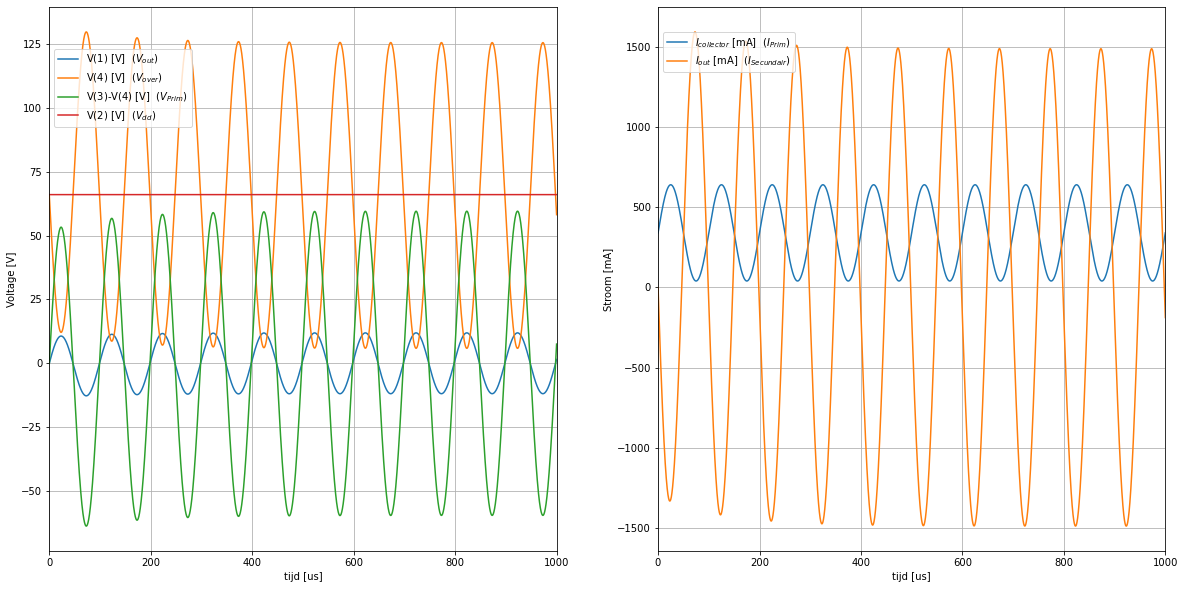

In [2]:
circuit=SpiceParser(path='simul/klasseA.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(1,2,figsize=(20, 10))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{over}$)' )
ax[0].plot(analysis.time*1e6,analysis.nodes['3']-analysis.nodes['4'],label='V(3)-V(4) [V]  ($V_{Prim}$)' )
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{dd}$)' )
ax[0].legend( loc=(0.01,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,analysis.branches['l1_tx1']*1e3,label='$I_{collector}$ [mA]  ($I_{Prim}$)')
ax[1].plot(analysis.time*1e6,analysis.branches['l2_tx1']*1e3,label='$I_{out}$ [mA]  ($I_{Secundair}$)')
ax[1].legend( loc=(0.01,.88))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: afigstroomvsspanning
---
 Klasse A versterker: stromen en spanningen als functie van de tijd
```

Het is ook altijd interessant om van dezelfde simulatie de stroom door de transistor versus de spanning over de transistor te plotten. Dit zien we in {numref}`afigstroomvsspanning2`.

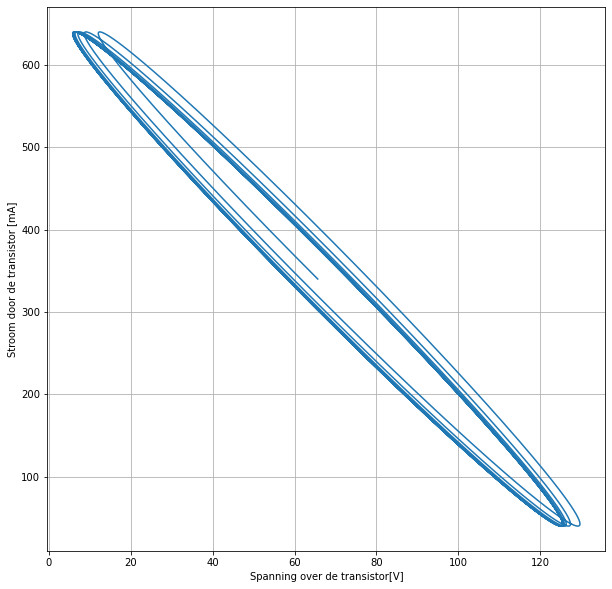

In [58]:
figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['4'],analysis.branches['l1_tx1']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: afigstroomvsspanning2
---
 Belastingskarakteristiek van de klasse A versterker
```

Wanneer we de spoelwaarde van de primaire en de secundaire wikkeling heel erg sterk verhogen (zonder de wikkelverhouding van 5 hierbij aan te passen), valt het faseverschil tussen de stroom en de spanning weg en krijgen we een plot waarbij we een mooi linair verband zien tussen stroom en spanning, zowel over de primaire (blauwe curve) als over de secundaire wikkeling (orange curve) (zie {numref`Afig3`). De  spice code voor deze simulatie met aangepaste wikkelverhouding kan je hieronder terugvinden.

In [59]:
spicelisting("simul/klasseA2.sp")

* Spice file van een eenvoudige Klasse A versterker
R_R6         0 1  8
R_R7         3 2  1
L1_TX1       3 4 25
L2_TX1       1 0 1
K_TX1        L1_TX1 L2_TX1 1.
Q_Q5         4 5 0 Q2
I_I4         0 5  SIN(17m 15m 10k)
V_VDD        2 0 66V

.model Q2  NPN(Is=14.34p BF=20 )



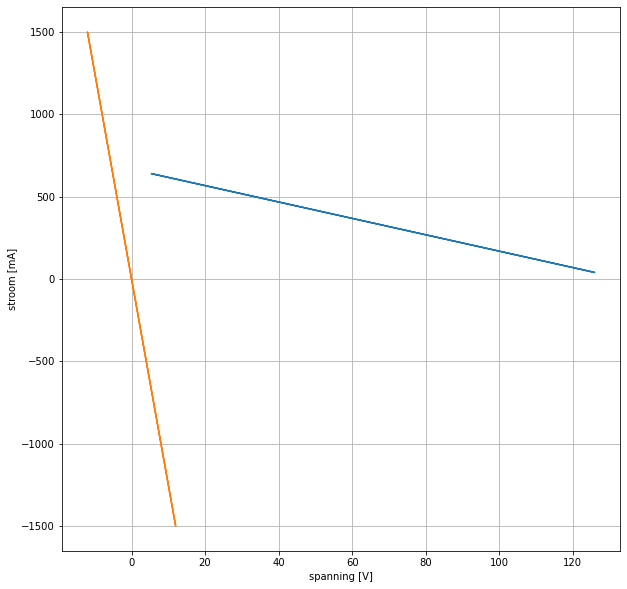

In [3]:
circuit=SpiceParser(path='simul/klasseA2.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['4'],analysis.branches['l1_tx1']*1e3)
ax.plot(analysis.nodes['1'],analysis.branches['l2_tx1']*1e3)
ax.grid()
ax.set_xlabel('spanning [V]')
ax.set_ylabel('stroom [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: Afig3
---
Stroom-spanningsrelaties voor de primaire en de secundaire wikkeling in het geval van een grote inductantie van de spoelen
```

Het verschil in fase tussen de stroom door de transistor en de spanning over de transistor kunnen we ook verkleinen door de frequentie te verhogen. In de onderstaande spice listing is de frequentie van de stroombron I4 aan de basis van de bipolaire transistor verhoogt van 10 kHz naar 100 kHz. Uit de simulatie in {numref}`AfigHF` zien we dat ook hier weer een bijna linair verloop tussen stroom en spanning wodt bekomen.

In [60]:
spicelisting("simul/klasseA3.sp")

* Spice file van een eenvoudige Klasse A versterker
R_R6         0 1  8
R_R7         3 2  1
L1_TX1       3 4 25m
L2_TX1       1 0 1m
K_TX1        L1_TX1 L2_TX1 1.
Q_Q5         4 5 0 Q2
I_I4         0 5  SIN(17m 15m 100k)
V_VDD        2 0 66V

.model Q2  NPN(Is=14.34p BF=20 )



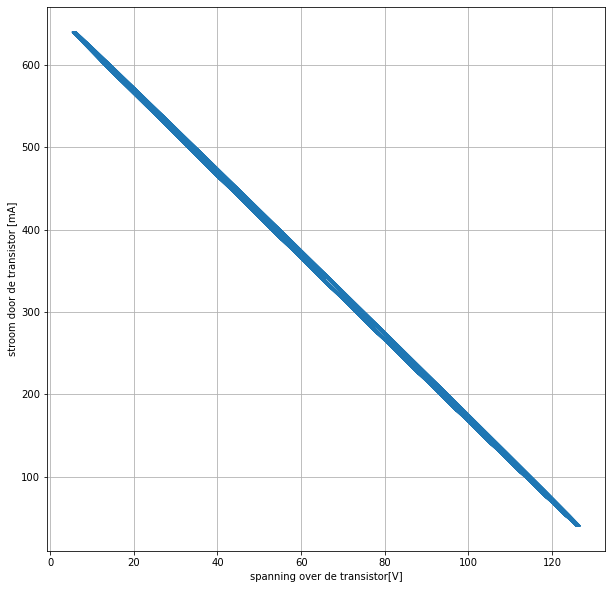

In [4]:
circuit=SpiceParser(path='simul/klasseA3.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(figsize=(10, 10))
ax.plot(analysis.nodes['4'],analysis.branches['l1_tx1']*1e3)
ax.grid()
ax.set_xlabel('spanning over de transistor[V]')
ax.set_ylabel('stroom door de transistor [mA]')
plt.show()

```{figure} ./images/mpl.svg
---
name: AfigHF
---
Stroom door de transistor versus spanning over de transistor in het geval van aansturing aan 100 kHz
```

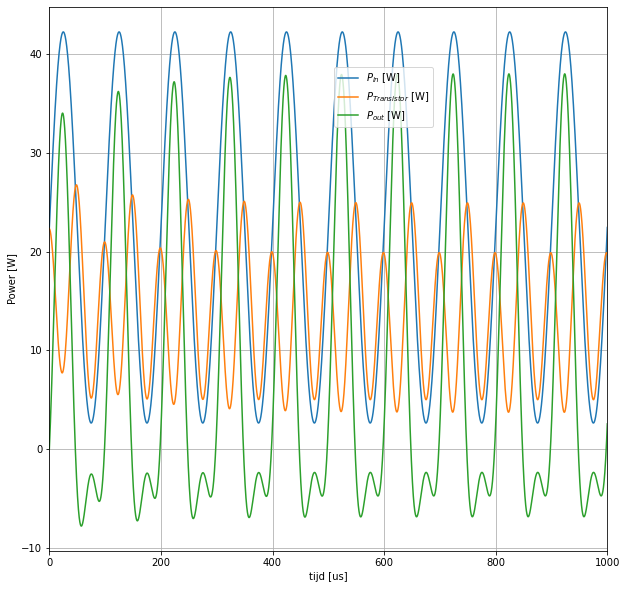

In [22]:
figure, ax = plt.subplots(1,1,figsize=(10, 10))
ax.plot(analysis.time*1e6,analysis.branches['l1_tx1']*66,label='$P_{in}$ [W]')
ax.plot(analysis.time*1e6,analysis.nodes['4']*analysis.branches['l1_tx1'],label='$P_{Transistor}$ [W]' )
ax.plot(analysis.time*1e6,(analysis.nodes['3']-analysis.nodes['4'])*analysis.branches['l1_tx1'],label='$P_{out}$ [W]' )
ax.legend( loc=(0.51,.78))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e6)
ax.set_ylabel('Power [W]');

```{figure} ./images/mpl.svg
---
name: afigvermogen
---
 Klasse A versterker: Ogenblikkelijk vermogen als functie van de tijd voor de simulatie van {numref}`afigstroomvsspanning`
```

We kunnen de simulatie van het ogenblikkelijk vermogen in {numref}`afigvermogen` ook integreren over een aantal periodes. We bekomen dat het gemiddeld vermogen:

$$ P_{in} = \frac{1}{T}\int_{0}^{T}V_{over} I_{door} \partial t $$

In [23]:
from scipy.integrate import simpson
pin=simpson(analysis.branches['l1_tx1']*66,analysis.time)/1e-3
ptransistor= simpson(analysis.nodes['4']*analysis.branches['l1_tx1'],analysis.time)/1e-3
puit=simpson((analysis.nodes['3']-analysis.nodes['4'])*analysis.branches['l1_tx1'],analysis.time)/1e-3
print(r"Het gemiddelde inputvermogen gedurende de 10 eerste periodes is {:.2f} W".format(pin))
print(r"Het gemiddelde vermogenverlies in de transistor gedurende de 10 eerste periodes is {:.2f} W".format(ptransistor))
print(r"Het gemiddelde vermogen aan de uitgang gedurende de 10 eerste periodes is {:.2f} W".format(puit))
print()
print("De gemiddelde efficentie gedurende de 10 eerste periodes is {:.2f} %".format( puit/pin*100))

Het gemiddelde inputvermogen gedurende de 10 eerste periodes is 22.44 W
Het gemiddelde vermogenverlies in de transistor gedurende de 10 eerste periodes is 13.78 W
Het gemiddelde vermogen aan de uitgang gedurende de 10 eerste periodes is 8.50 W

De gemiddelde efficentie gedurende de 10 eerste periodes is 37.89 %
